This notebook contains the code needed to process the data which tracks the POIS and diversity, as generated by 'generate_POIS.ipynb'
This code is part of the paper "The Importance of Being Restrained" 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import pickle as pkl

log_folder_location = "logs_dict" #where to find the processed logs
sdiss = ['COTN', 'mirror', 'saturate', 'toroidal', 'unif_resample']
# sdiss = ['c', 'm', 's', 't', 'u', 'h']
sdiss_lables = ['COTN', 'Mir', 'Sat', 'Tor', 'Uni']
sdis_label_dict = {k:v for k,v in zip(sdiss, sdiss_lables)}
colors = sbs.color_palette('Set2', len(sdiss)+2)
colors.pop(-2)
# sdiss = ['c', 'm', 's', 't', 'u', 'h']

(1.0, 0.8509803921568627, 0.1843137254901961)

In [2]:
font = {'size'   : 30}

plt.rc('font', **font)

In [14]:
def plot_running_pois(fid, iid = 1, dim = 5, de_version = 'lshade'):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        show_label = True
        for rep in range(5):
            with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            x = res['corrections']
#             x = np.load(f"logs_corr/per_run/F{fid}_{sdis}_I{iid}_R{rep}.npy")
            if show_label:
                plt.plot(range(len(x)),[v/c for c,v in enumerate(np.cumsum(x))], label=f'{sdis}', c=colors[sidx])
                show_label = False
            else:
                plt.plot(range(len(x)),[v/c for c,v in enumerate(np.cumsum(x))], c=colors[sidx])
            solved = np.where(np.array(res['fitness']) < 1e-8)[0]
            if len(solved) > 0:
                plt.axvline(np.sum(res['popsize'][:solved[0]]), color = colors[sidx], ls='--')
    # plt.plot(range(len(x2)),[v/c for c,v in enumerate(np.cumsum(x2))])
#     plt.axvline(49, c='k')
#     plt.axvline(99, c='k')
#     plt.xscale('log')
    plt.legend()
    plt.xlim(45,50000)
    plt.tight_layout()
    plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_running_pois.pdf")
    plt.close()
#     plt.show()

In [ ]:
for fid in range(1,25):
    plot_running_pois(fid, iid = 1, dim=5, de_version = 'shade')

In [3]:
def plot_sliding_window_pois(fid, iid = 1, dim = 5, de_version = 'lshade'):
    # colors = sbs.color_palette('Set2', len(sdiss)+2) #plus 2 here, since 'h' was not used for these experiments
    # colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        show_label = True
        for rep in range(5):
            with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            x = res['corrections']
            y = res['popsize']
            if show_label:
                plt.plot(range(int(len(y)-10)),[np.sum(x[int(np.sum(y[:i])):int(np.sum(y[:i+10]))])/np.sum(y[i:i+10]) for i in range(len(y)-10)], label=f'{sdis_label_dict[sdis]}', c=colors[sidx])
                show_label = False
            else:
                plt.plot(range(int(len(y)-10)),[np.sum(x[int(np.sum(y[:i])):int(np.sum(y[:i+10]))])/np.sum(y[i:i+10]) for i in range(len(y)-10)], c=colors[sidx])
            solved = np.where(np.array(res['fitness']) < 1e-8)[0]
            if len(solved) > 0:
                plt.axvline(solved[0], color = colors[sidx], ls='--')
    # plt.plot(range(len(x2)),[v/c for c,v in enumerate(np.cumsum(x2))])
#     plt.axvline(49, c='k')
#     plt.axvline(99, c='k')
#     plt.xscale('log')
    plt.legend()
    plt.xlabel("Start Generation")
    plt.ylabel("Fraction of Corrections")
#     plt.xlim(45,50000)
    plt.tight_layout()
    plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_window_pois.pdf")
#     plt.close()
#     plt.show()

In [ ]:
for dim in [5,30]:
    for fid in [5,23]:
        for de_version in ['shade','lshade']:
            plot_sliding_window_pois(fid, 1, dim=dim, de_version=de_version)

In [ ]:
for fid in range(1,25):
    plot_sliding_window_pois(fid, dim=5, de_version='lshade')

In [6]:
def plot_diversity(fid, iid = 1, dim = 5, de_version = 'lshade'):
    # colors = sbs.color_palette('Set2', len(sdiss)+2)
    # colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        show_label = True
        for rep in range(5):
            with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            n_iters = len(res['popsize'])
            x = res['corrections']
            if show_label:
                plt.plot(range(n_iters),res['diversity'], label=f'{sdis_label_dict[sdis]}', c=colors[sidx])
                show_label = False
            else:
                plt.plot(range(n_iters),res['diversity'], c=colors[sidx])
            solved = np.where(np.array(res['fitness']) < 1e-8)[0]
            if len(solved) > 0:
                plt.axvline(solved[0], color = colors[sidx], ls='--')
    # plt.plot(range(len(x2)),[v/c for c,v in enumerate(np.cumsum(x2))])
#     plt.axvline(49, c='k')
#     plt.axvline(99, c='k')
    plt.yscale('log')
    plt.legend()
    plt.xlabel("Generation")
    plt.ylabel("Population Diversity")
#     plt.xlim(45,50000)
    plt.tight_layout()
    plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_diversity.pdf")
#     plt.close()
#     plt.show()

In [ ]:
for dim in [5,30]:
    for fid in [5,23]:
        for de_version in ['shade','lshade']:
            plot_diversity(fid, 1, dim=dim, de_version=de_version)
            # plot_diversity(5, 1, 5, de_version='shade')

In [ ]:
for fid in range(1,25):
    plot_diversity(fid, dim=5, de_version='shade')

In [5]:
sdiss_sorted = ['COTN', 'mirror', 'saturate', 'toroidal', 'unif_resample']

In [9]:
def plot_final_pois_heatmap(dim, de_version, iid):
    pois_array = np.zeros((24,len(sdiss)))
    for fid in range(1,25):
        for sidx, sdis in enumerate(sdiss_sorted):
            temp = 0
            for rep in range(5):
                # print(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl")
                with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                    res = pkl.load(f)
                temp += np.sum(res['corrections'])/len(res['corrections'])
            pois_array[fid-1, sidx] = temp/5
    
    plt.figure(figsize=(20,8))
    sbs.heatmap(np.transpose(pois_array), cmap='viridis', vmax=1)
    plt.yticks([i+0.5 for i in range(5)], [sdis_label_dict[x] for x in sdiss_sorted], rotation=45)
    plt.xticks([i+0.5 for i in range(24)], range(1,25),rotation=0)
    plt.xlabel("Function ID")
    plt.ylabel("SDIS")
    plt.tight_layout()
    plt.savefig(f"Figures/Final_POIS_{dim}D_{de_version}_I{iid}.pdf")
    plt.show()

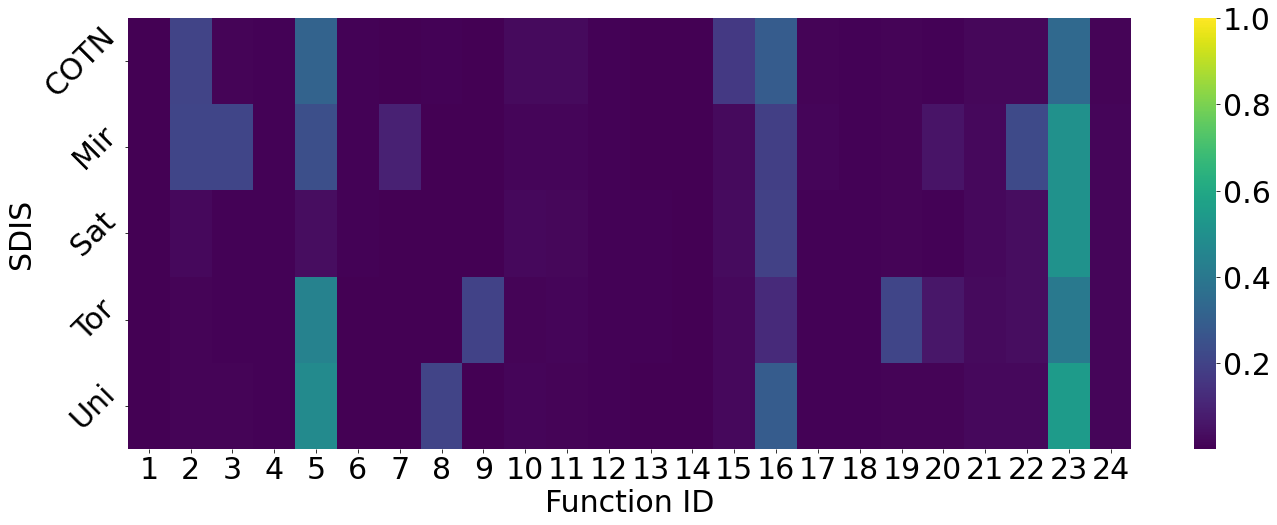

In [11]:
plot_final_pois_heatmap(5, 'lshade', 1)

In [4]:
def plot_final_pois_heatmap_all_iid(dim, de_version):
    pois_array = np.zeros((24,len(sdiss)))
    for fid in range(1,25):
        for sidx, sdis in enumerate(sdiss_sorted):
            temp = 0
            for iid in range(1,6):
                for rep in range(5):
                    with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                        res = pkl.load(f)
                    temp += np.sum(res['corrections'])/len(res['corrections'])
            pois_array[fid-1, sidx] = temp/25
    
    plt.figure(figsize=(20,8))
    sbs.heatmap(np.transpose(pois_array), cmap='viridis', vmax=1)
    plt.yticks([i+0.5 for i in range(5)], sdiss_sorted, rotation=45)
    plt.xticks([i+0.5 for i in range(24)], range(1,25))
    plt.xlabel("Function ID")
    plt.ylabel("SDIS")
    plt.tight_layout()
    plt.savefig(f"Figures/Final_POIS_{dim}D_{de_version}_IAll.pdf")
    plt.show()

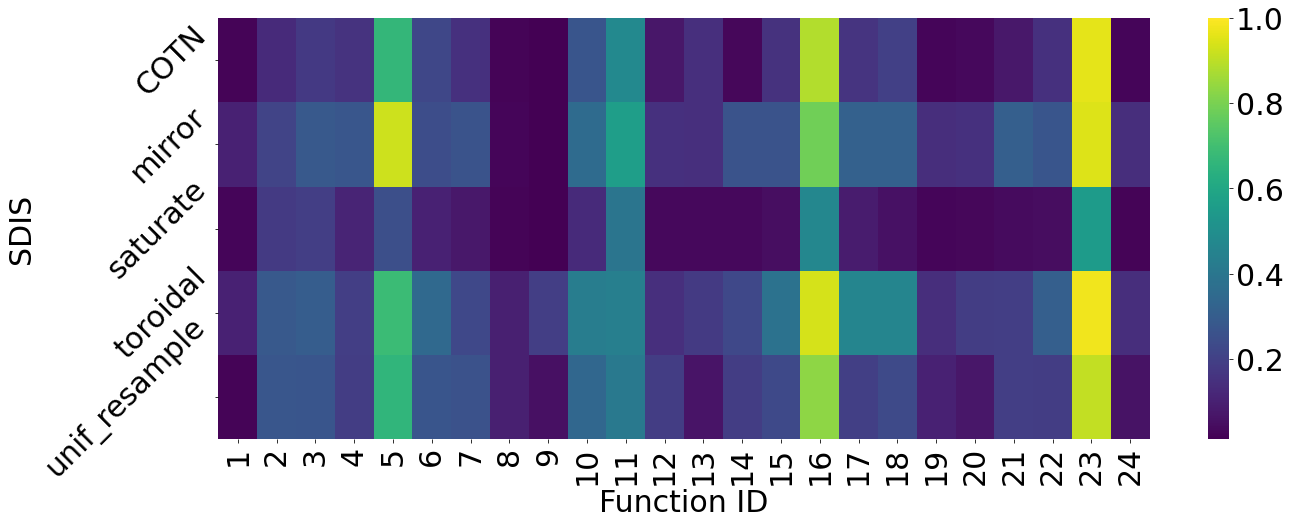

In [8]:
plot_final_pois_heatmap_all_iid(30, 'lshade')

In [23]:
def plot_cos(fid, iid = 1, dim = 5, de_version = 'lshade', sdiss = sdiss, reps = range(5)):
    colors = sbs.color_palette('Set2', len(sdiss)+2)
    colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        show_label = True
        for rep in reps:
            with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            n_iters = len(res['popsize'])
            x = res['corrections']
            if show_label:
                plt.scatter(range(len(res['cosine'])), res['cosine'], label=f'{sdis}', color=colors[sidx], alpha=0.3)
                show_label = False
            else:
                plt.scatter(range(len(res['cosine'])), res['cosine'], color=colors[sidx], alpha=0.3)
            # solved = np.where(np.array(res['fitness']) < 1e-8)[0]
            # if len(solved) > 0:
            #     plt.axvline(solved[0], color = colors[sidx], ls='--')
    # plt.plot(range(len(x2)),[v/c for c,v in enumerate(np.cumsum(x2))])
#     plt.axvline(49, c='k')
#     plt.axvline(99, c='k')
    plt.xlim(19*dim, 10000*dim)
    plt.xscale('log')
    plt.legend()
    plt.xlabel("Evaluation")
    plt.ylabel("Cosine Similarity")
#     plt.xlim(45,50000)
    plt.tight_layout()
    if len(sdiss) == 1:
        plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_{sdiss[0]}_Cosine.pdf")
    else:
        plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_Cosine.pdf")
    plt.close()
#     plt.show()

In [24]:
for fid in range(1,25):
    for sdis in sdiss:
        plot_cos(fid, sdiss=[sdis])

In [ ]:
# Save for all 5 runs + 1 run, each sdis, each function (over time + ECDF)

In [17]:
plot_cos(16, sdiss=['toroidal', 'mirror'], reps=[3])

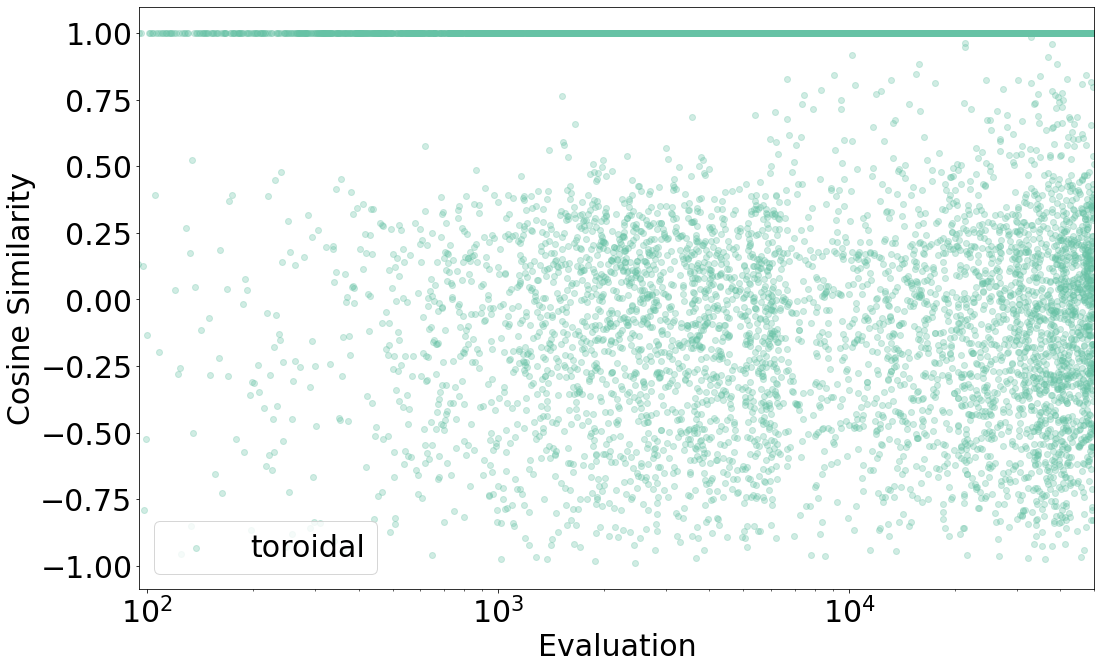

In [41]:
plot_cos(16, sdiss=['toroidal'], reps=[1])

In [ ]:
# Nan instead of 1
# ECDF (no time component) 

In [22]:
plot_cos(1, sdiss=['toroidal'], reps=[1])

In [4]:
with open(f"{log_folder_location}/lshade_F{5}_{5}D_I{1}_mirror_R{1}.pkl", "rb") as f: 
    res = pkl.load(f)

In [20]:
res.keys()

dict_keys(['diversity', 'fitness', 'corrections', 'popsize', 'cosine'])

In [21]:
res['cosine']==2

False

In [4]:
#ECDF version of previous plot 
def create_POIS_ECDF(fid):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
#     fig, axes = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all')
    plt.figure(figsize=(16,10))
#     for idx_0, F in enumerate(['099','0755','052','0285','005']):
#         for idx_1, CR in enumerate(['0041','0081','0121','0161','0201']):
    bins = np.arange(-1.000000000,1.00000001,0.05)
    for sidx, sdis in enumerate(sdiss):
        cos = []
        for rep in range(5):
            with open(f"{log_folder_location}/shade_F{fid}_{5}D_I{1}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            cos += res['cosine']
#         dt = get_merged_dt_v3(sdis, F, CR, popsize)
#         dt_applied = dt[dt['nr_exceed'] >= 1]
        cos = np.array(cos)[~np.isnan(cos)]
        max_len = len(cos)
        plt.plot([np.sum(cos<=b)/max_len for b in bins], label=f'SDIS: {sdis}', lw=2, c=colors[sidx])
    plt.legend(fontsize=10)
    plt.ylim(0,1)
    plt.xlim(0,40)
    plt.xticks(range(len(bins))[::5],[f"{x:.2f}" for x in bins[::5]])

#             if idx_0 == 4:
#                 axes[idx_0, idx_1].set_xlabel(f'CR 0.{CR[1:]}')
#                 axes[idx_0, idx_1].set_xticks(range(len(bins))[::5])
#                 axes[idx_0, idx_1].set_xticklabels([f"{x:.2f}" for x in bins[::5]], fontsize=9)

#         axes[idx_0, 0].set_ylabel(f'F: 0.{F[1:]}')
#     fig.set_figheight(20)
#     fig.set_figwidth(20)
    plt.tight_layout()
#     plt.subplots_adjust(hspace=0.03, wspace=0.03)

    plt.savefig(f"Figures/ECDF_BBOB_F{fid}_shade.pdf")

In [ ]:
for fid in range(1,25):
    create_POIS_ECDF(fid)

In [ ]:
def create_plot_matrix_diversity(popsize):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
    fig, axes = plt.subplots(nrows=5, ncols=10, sharex='all', sharey='all')
    bins = np.arange(-1.000000000,1.00000001,0.05)

    for idx_0, F in enumerate(['099','0755','052','0285','005']):
        for idx_1, CR in enumerate(['005', '00891', '01283', '01675', '02067', '02458', '0285', '052', '0755', '099']):
            for sidx, sdis in enumerate(sdiss):
                add_legend = True
                dt = get_diversity_dt(sdis, F, CR, popsize)
                nr_runs = int(len(dt)/(300000/popsize))
                div1s = np.array(dt['div0']).reshape(nr_runs,-1)
                for idx in range(nr_runs):
                    if add_legend:
                        axes[idx_0, idx_1].plot(div1s[idx,:], color=colors[sidx], alpha=0.4, label = sdis)
                        add_legend=False
                    axes[idx_0, idx_1].plot(div1s[idx,:], color=colors[sidx], alpha=0.4)
            axes[idx_0, idx_1].set_yscale('log')
            axes[idx_0, idx_1].set_xscale('log')
#             axes[idx_0, idx_1].grid()
            
#             for sdis in sdiss:
#                 dt = get_merged_dt_v2(cross, sdis, F, CR, popsize)
#                 dt_applied = dt[dt['applied'] >= 1]
#                 max_len = len(dt_applied)
#                 axes[idx_0, idx_1].plot([np.sum(dt_applied['cosine']<=b)/max_len for b in bins], label=f'SDIS: {sdis}', lw=2)
#             axes[idx_0, idx_1].legend(fontsize=10)
#             axes[idx_0, idx_1].set_ylim(0,1)
#             axes[idx_0, idx_1].set_xlim(0,40)


            if idx_0 == 4:
                axes[idx_0, idx_1].set_xlabel(f'0.{CR[1:]}')
#                 axes[idx_0, idx_1].set_xticks(range(len(bins))[::5])
#                 axes[idx_0, idx_1].set_xticklabels([f"{x:.2f}" for x in bins[::5]], fontsize=9)

        axes[idx_0, 0].set_ylabel(f'0.{F[1:]}')
#     fig.set_xlabel("CR")
#     fig.set_ylabel("F")
    fig.set_figheight(20)
    fig.set_figwidth(35)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.03)

    plt.savefig(f"Figures/Matrix_div_p{popsize}_V2.pdf")

In [12]:
#ECDF version of previous plot 
def create_POIS_ECDF_matrix(algname):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
#     add_legend = True
    fig, axes = plt.subplots(nrows=6, ncols=4, sharex='all', sharey='all')
#     plt.figure(figsize=(16,10))
    for idx_0 in range(6):
        for idx_1 in range(4):
            fid = 1 + 4*idx_0 + idx_1
            bins = np.arange(-1.000000000,1.00000001,0.05)
            for sidx, sdis in enumerate(sdiss):
                cos = []
                for rep in range(5):
                    with open(f"{log_folder_location}/{algname}_F{fid}_{5}D_I{1}_{sdis}_R{rep}.pkl", "rb") as f: 
                        res = pkl.load(f)
                    cos += res['cosine']
        #         dt = get_merged_dt_v3(sdis, F, CR, popsize)
        #         dt_applied = dt[dt['nr_exceed'] >= 1]
                cos = np.array(cos)[~np.isnan(cos)]
                max_len = len(cos)
#                 if add_legend:
#                     axes[idx_0, idx_1].plot(div1s[idx,:], color=colors[sidx], alpha=0.4, label = sdis)
#                     add_legend=False
                axes[idx_0, idx_1].plot([np.sum(cos<=b)/max_len for b in bins], label=f'{sdis_label_dict[sdis]}', lw=2, c=colors[sidx])
#                 plt.plot([np.sum(cos<=b)/max_len for b in bins], label=f'SDIS: {sdis}', lw=2, c=colors[sidx])
                axes[idx_0, idx_1].legend(fontsize=11)
#             plt.ylim(0,1)
#             plt.xlim(0,40)
#             plt.xticks(range(len(bins))[::5],[f"{x:.2f}" for x in bins[::5]])

            if idx_0 == 5:
#                 axes[idx_0, idx_1].set_xlabel(f'CR 0.{CR[1:]}')
                axes[idx_0, idx_1].set_xticks(range(len(bins))[::5])
                axes[idx_0, idx_1].set_xticklabels([f"{x:.2f}" for x in bins[::5]], fontsize=11)

#         axes[idx_0, 0].set_ylabel(f'F: 0.{F[1:]}')
    fig.set_figheight(30)
    fig.set_figwidth(20)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.03)

    plt.savefig(f"Figures/ECDF_BBOB_matrix_{algname}.pdf")

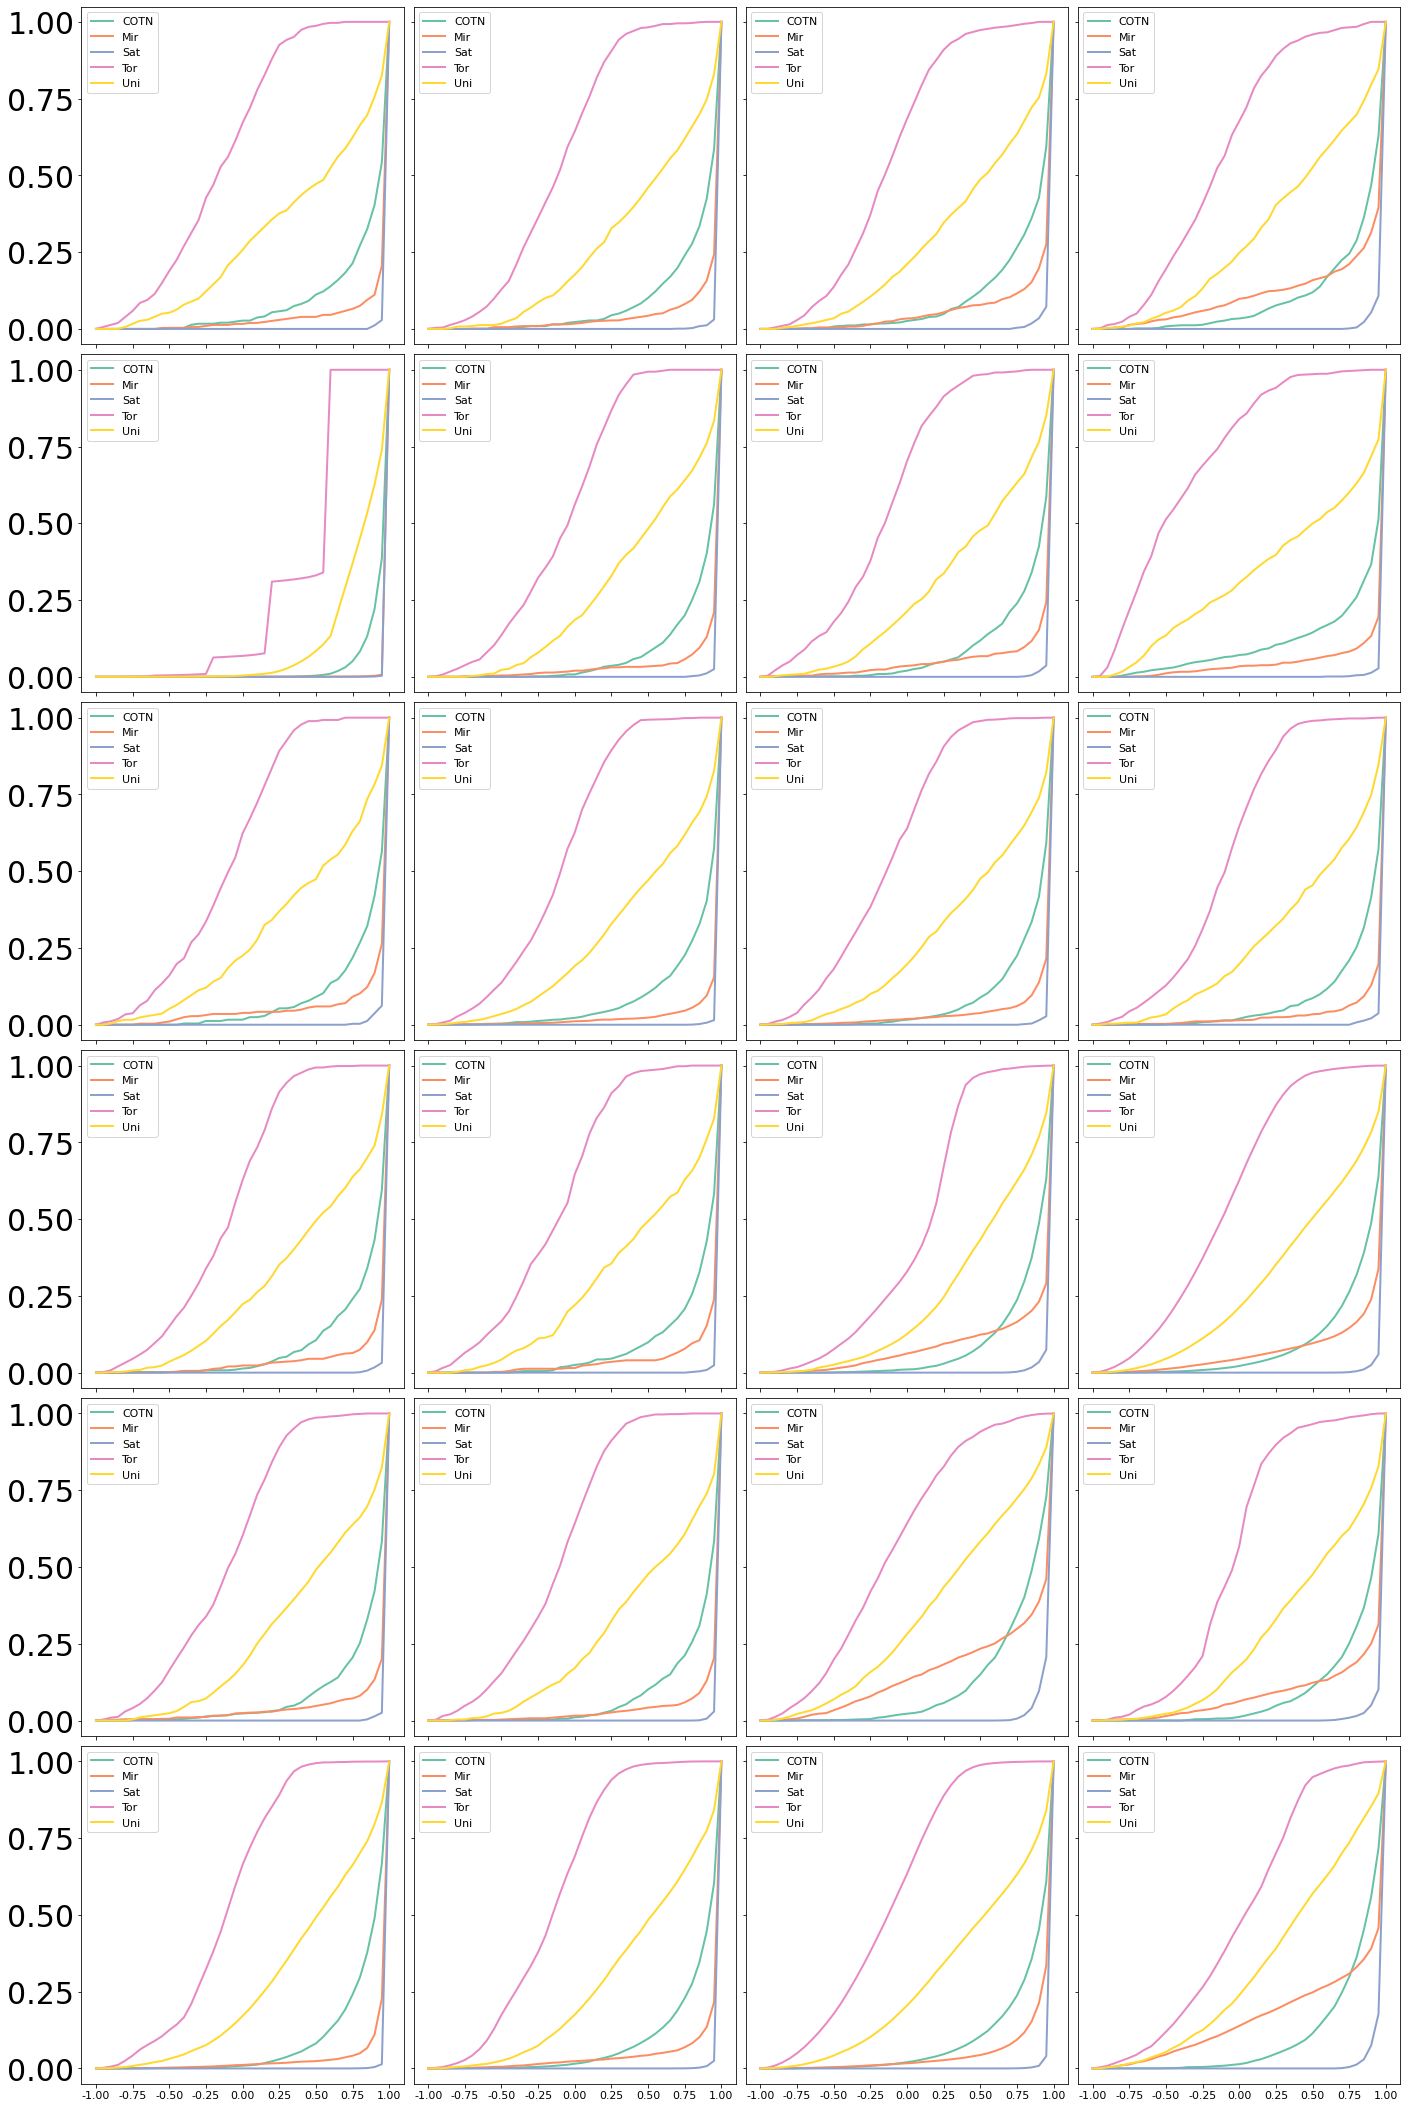

In [13]:
create_POIS_ECDF_matrix('shade')

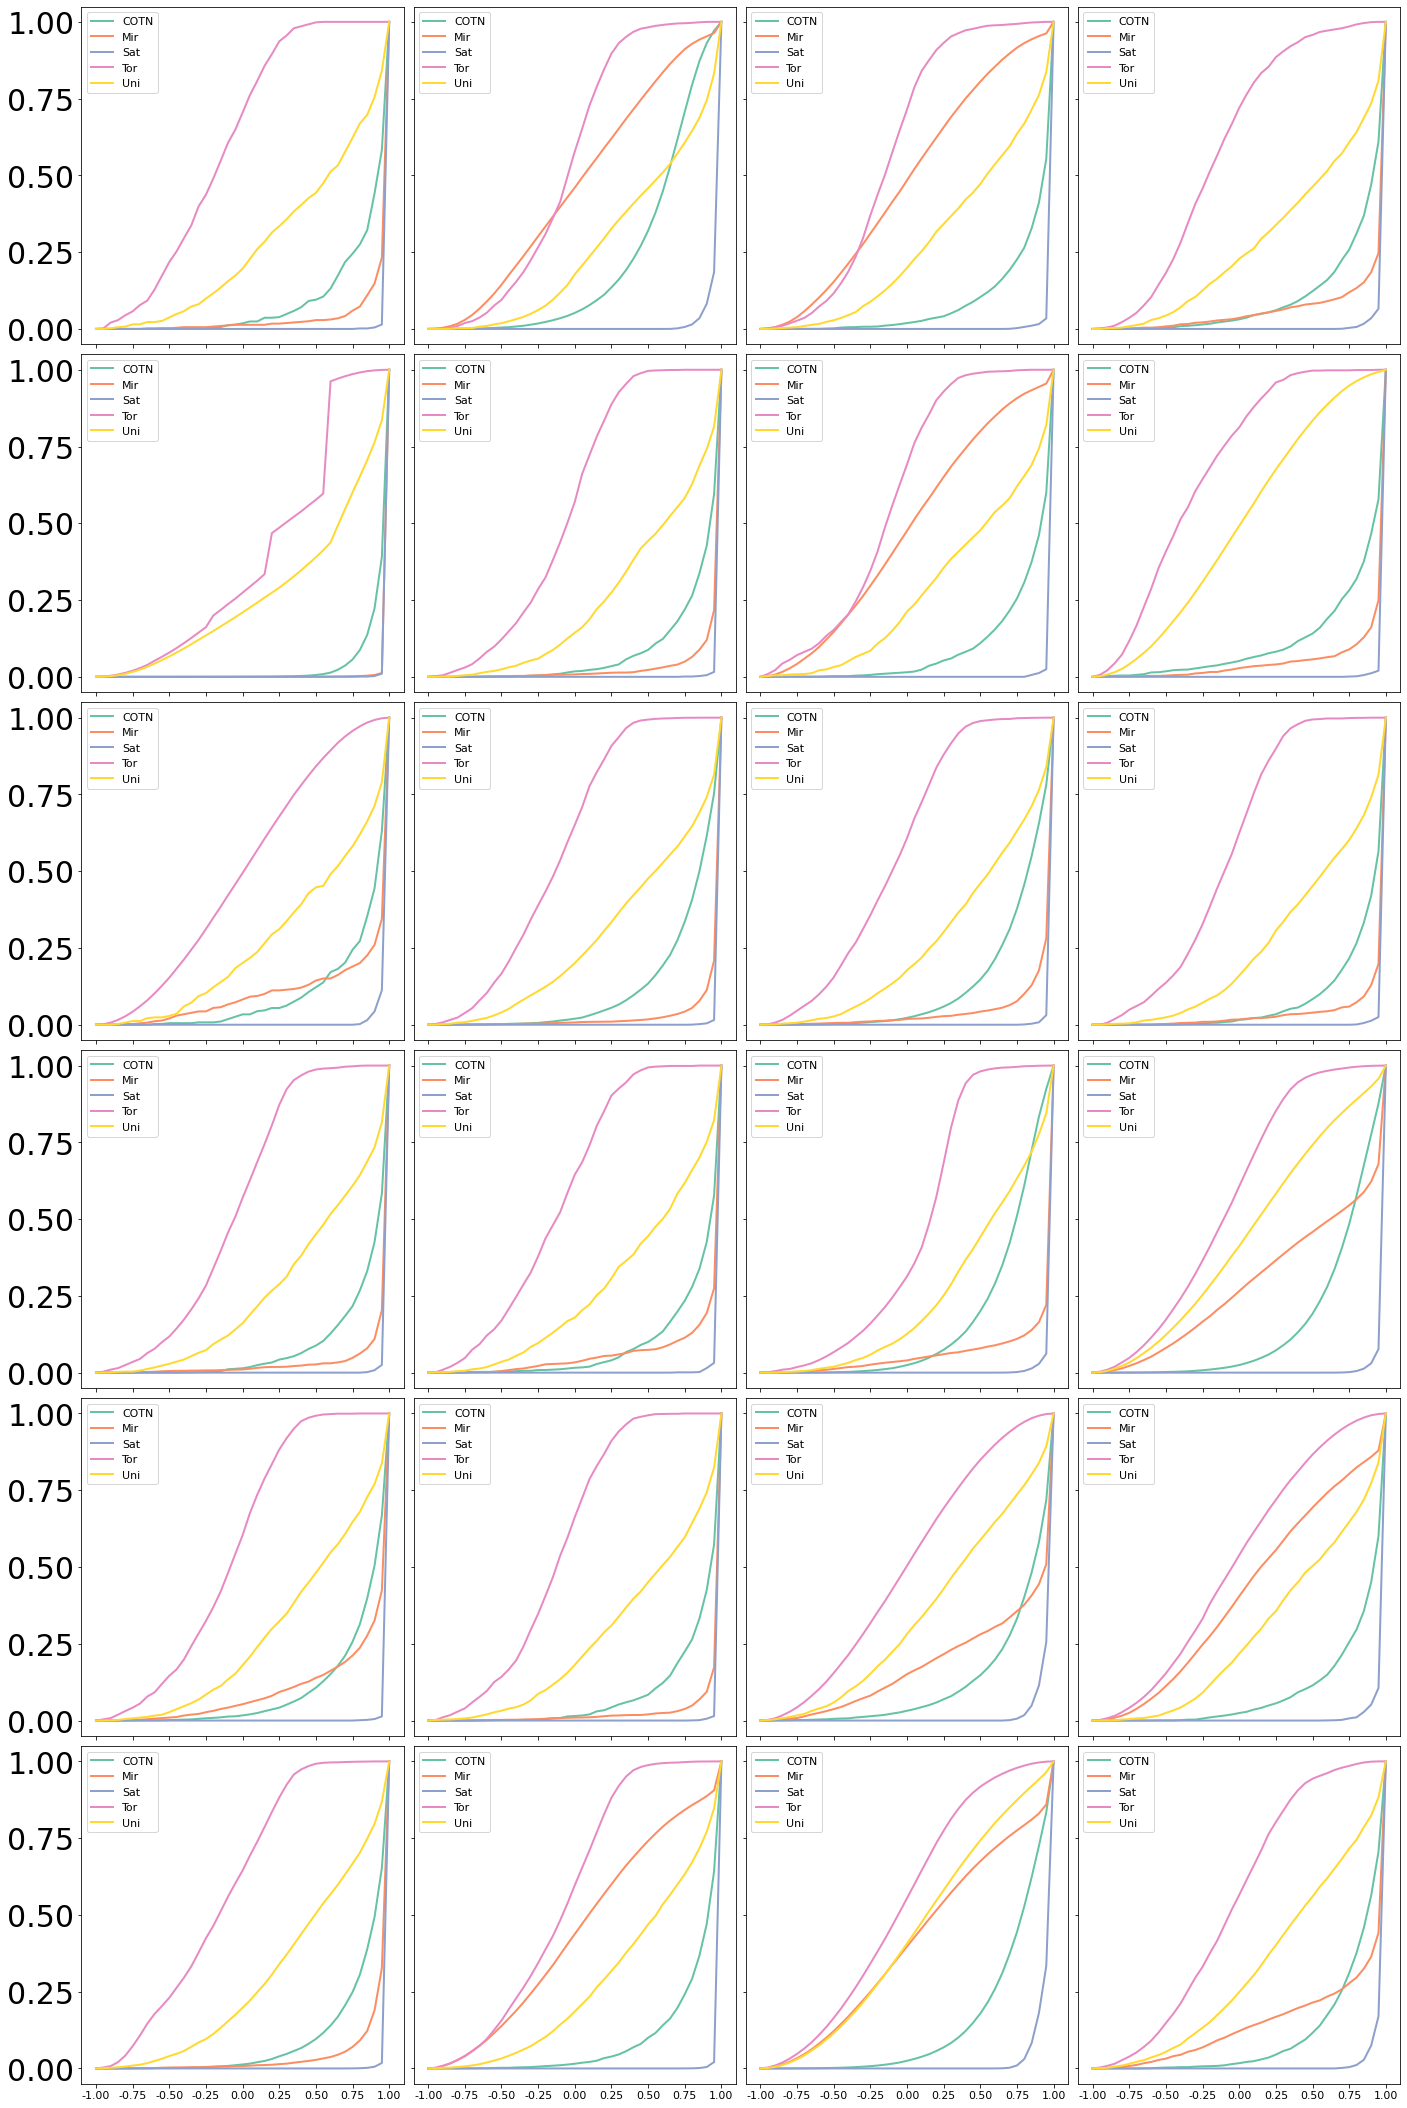

In [14]:
create_POIS_ECDF_matrix('lshade')